In [1]:
import pandas as pd

df = pd.read_excel('BTC-USD_historical_data.xlsx', parse_dates=['Date'], index_col=0)
df

,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction
Date,,,,,,,
2014-10-01,387.427002,411.697998,289.295990,338.321014,902994450,0.105082,UP
2014-11-01,338.649994,457.092987,320.626007,378.046997,659733360,-0.180685,DOWN
2014-12-01,378.248993,384.037994,304.231995,320.192993,553102310,-0.472395,DOWN
2015-01-01,320.434998,320.434998,171.509995,217.464005,1098811912,0.144728,UP
2015-02-01,216.867004,265.610992,212.014999,254.263000,711518700,-0.041106,DOWN
...,...,...,...,...,...,...,...
2024-04-01,71333.484375,72715.359375,59120.066406,60636.855469,1016068331704,0.101562,UP
2024-05-01,60609.496094,71946.460938,56555.292969,67491.414062,874291509757,-0.076791,DOWN
2024-06-01,67489.609375,71907.851562,58601.699219,62678.292969,726773965644,0.030037,UP


In [2]:
target = df.change_tomorrow
explanatory = df[['Open','High','Low','Close','Volume']]

In [3]:
from sklearn.tree import DecisionTreeRegressor

In [4]:
model_dt = DecisionTreeRegressor(max_depth =15)

In [5]:
model_dt.fit(X = explanatory, y = target)

DecisionTreeRegressor(max_depth=15)

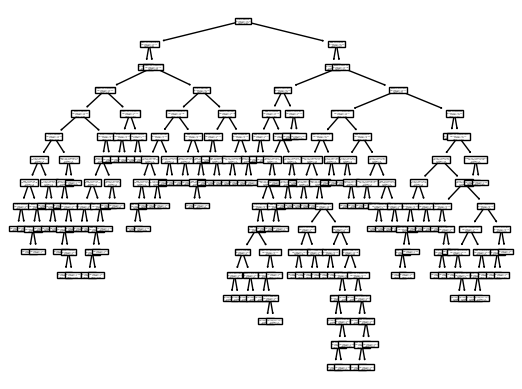

In [6]:
from sklearn.tree import plot_tree

plot_tree(decision_tree = model_dt, feature_names = model_dt.feature_names_in_);

In [7]:
y_pred = model_dt.predict(X=explanatory)

In [8]:
df_predictions = df[['change_tomorrow']].copy()

df_predictions['prediction'] = y_pred
df_predictions

,change_tomorrow,prediction
Date,,
2014-10-01,0.105082,0.105082
2014-11-01,-0.180685,-0.180685
2014-12-01,-0.472395,-0.472395
2015-01-01,0.144728,0.144728
2015-02-01,-0.041106,-0.041106
...,...,...
2024-04-01,0.101562,0.101562
2024-05-01,-0.076791,-0.076791
2024-06-01,0.030037,0.030037


In [9]:
model_dt.score(X=explanatory, y =target)

1.0

In [10]:
#interpret the errors, difference between the error 

In [11]:
df_predictions = df[['change_tomorrow']].copy()

df_predictions['prediction'] = y_pred
df_predictions

,change_tomorrow,prediction
Date,,
2014-10-01,0.105082,0.105082
2014-11-01,-0.180685,-0.180685
2014-12-01,-0.472395,-0.472395
2015-01-01,0.144728,0.144728
2015-02-01,-0.041106,-0.041106
...,...,...
2024-04-01,0.101562,0.101562
2024-05-01,-0.076791,-0.076791
2024-06-01,0.030037,0.030037


In [12]:
df_predictions['error'] = df_predictions.prediction - df_predictions.change_tomorrow

In [13]:
df_predictions

,change_tomorrow,prediction,error
Date,,,
2014-10-01,0.105082,0.105082,0.0
2014-11-01,-0.180685,-0.180685,0.0
2014-12-01,-0.472395,-0.472395,0.0
2015-01-01,0.144728,0.144728,0.0
2015-02-01,-0.041106,-0.041106,0.0
...,...,...,...
2024-04-01,0.101562,0.101562,0.0
2024-05-01,-0.076791,-0.076791,0.0
2024-06-01,0.030037,0.030037,0.0


In [14]:
df_predictions['error']

Date
2014-10-01    0.0
2014-11-01    0.0
2014-12-01    0.0
2015-01-01    0.0
2015-02-01    0.0
             ... 
2024-04-01    0.0
2024-05-01    0.0
2024-06-01    0.0
2024-07-01    0.0
2024-08-01    0.0
Name: error, Length: 119, dtype: float64

In [15]:
#calculate the sum of error
df_predictions.error.sum().round(2)

0.0

In [16]:
df_predictions['error2'] = df_predictions.error**2

In [17]:
##ERROR with absolute value
sse = df_predictions.error2.sum()  

In [18]:
mse = df_predictions.error2.mean()

In [19]:
import numpy as np

In [20]:
rmse=np.sqrt(mse)

<Axes: >

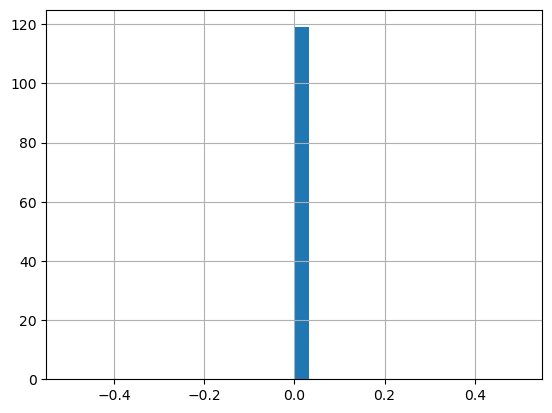

In [21]:
df_predictions.error.hist(bins=30)

In [22]:
rmse

0.0

<Axes: >

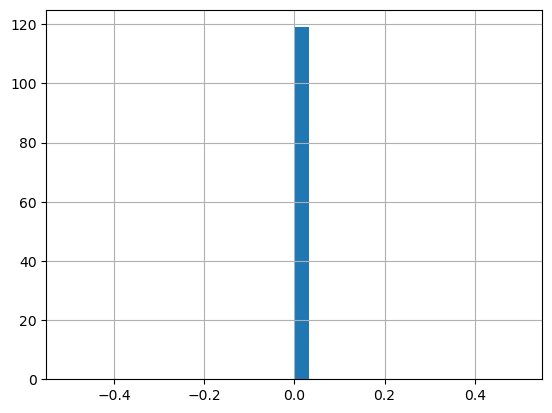

In [23]:
df_predictions.error.hist(bins=30)

In [24]:
##Backtesting the investment strategy

In [25]:
import pickle

In [26]:
##save model into files
#import os
#os.makedirs('models')


In [27]:
model_dt

DecisionTreeRegressor(max_depth=15)

In [28]:
import pickle

In [29]:
with open('model_dt_classification.pkl', 'wb') as f:
    pickle.dump(model_dt, f)

In [30]:
model_dt

DecisionTreeRegressor(max_depth=15)

In [31]:
##Load Data
df = pd.read_excel('BTC-USD_historical_data.xlsx', parse_dates=['Date'], index_col=0)
df

,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction
Date,,,,,,,
2014-10-01,387.427002,411.697998,289.295990,338.321014,902994450,0.105082,UP
2014-11-01,338.649994,457.092987,320.626007,378.046997,659733360,-0.180685,DOWN
2014-12-01,378.248993,384.037994,304.231995,320.192993,553102310,-0.472395,DOWN
2015-01-01,320.434998,320.434998,171.509995,217.464005,1098811912,0.144728,UP
2015-02-01,216.867004,265.610992,212.014999,254.263000,711518700,-0.041106,DOWN
...,...,...,...,...,...,...,...
2024-04-01,71333.484375,72715.359375,59120.066406,60636.855469,1016068331704,0.101562,UP
2024-05-01,60609.496094,71946.460938,56555.292969,67491.414062,874291509757,-0.076791,DOWN
2024-06-01,67489.609375,71907.851562,58601.699219,62678.292969,726773965644,0.030037,UP


In [32]:
##backtesting.py Library

In [33]:
from backtesting import Backtest, Strategy

C:\Users\Dell\anaconda3\Lib\site-packages\backtesting\_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [34]:
#if the stock goes down 5%, sell. If goes up 5%, buy.
class Regression(Strategy):
    def init(self):
        self.model = model_dt
        self.already_bought = False

    def next(self):
        explanatory_today = self.data.df.iloc[[-1],:]
        forecast_tomorrow = model_dt.predict(explanatory_today)[0]
        
        # conditions to buy or sell
        if forecast_tomorrow > 0.01 and self.already_bought == False:
            self.buy()
            self.already_bought = True
        elif forecast_tomorrow < -0.01 and self.already_bought == True:
            self.sell()
            self.already_bought = False
        else:
            pass

In [35]:
df_explanatory = df.drop(columns=['change_tomorrow', 'change_tomorrow_direction'])

In [36]:
bt = Backtest(df_explanatory, Regression,
            cash = 10000, commission = 0.002, exclusive_orders = True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_6200\3226614094.py:1: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(df_explanatory, Regression,


In [37]:
results = bt.run()

In [38]:
results.to_frame(name='Values').loc[:'Return [%]']

,Values
Start,2014-10-01 00:00:00
End,2024-08-01 00:00:00
Duration,3592 days 00:00:00
Exposure Time [%],96.638655
Equity Final [$],188845213908.585449
Equity Peak [$],189205126090.405029
Return [%],1888452039.085855


In [39]:
## Optimizing Strategy Parameters

In [40]:
from backtesting import Strategy, Backtest

In [41]:
class Regression(Strategy):
    limit_buy = 0.01
    limit_sell = -0.05
    
    def init(self):
        self.model = model_dt
        self.already_bought = False

    def next(self):
        explanatory_today = self.data.df.iloc[[-1], :]
        forecast_tomorrow = self.model.predict(explanatory_today)[0]
        
        if forecast_tomorrow > self.limit_buy and self.already_bought == False:
            self.buy()
            self.already_bought = True
        elif forecast_tomorrow < self.limit_sell and self.already_bought == True:
            self.sell()
            self.already_bought = False
        else:
            pass

In [42]:
df_explanatory = df[['Open', 'High', 'Low', 'Close', 'Volume']].copy()

In [43]:
bt = Backtest(df_explanatory, Regression,
              cash=10000, commission=.002, exclusive_orders=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_6200\1143378273.py:1: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(df_explanatory, Regression,


In [44]:
list_limits_buy = [round(i * 0.01, 2) for i in range(0, 11)]
list_limits_buy

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

In [45]:
list_limits_sell = [round(i * 0.01, 2) for i in range(-11, 1)]
list_limits_sell

[-0.11,
 -0.1,
 -0.09,
 -0.08,
 -0.07,
 -0.06,
 -0.05,
 -0.04,
 -0.03,
 -0.02,
 -0.01,
 0.0]

In [46]:
%%time

results = bt.optimize(
    limit_buy = list_limits_buy, limit_sell = list_limits_sell,
    maximize='Return [%]', return_heatmap=True
)

  0%|          | 0/9 [00:00<?, ?it/s]

CPU times: total: 17 s
Wall time: 19.6 s


In [47]:
results[0]

Start                     2014-10-01 00:00:00
End                       2024-08-01 00:00:00
Duration                   3592 days 00:00:00
Exposure Time [%]                   96.638655
Equity Final [$]          188845213908.585449
Equity Peak [$]           189205126090.405029
Return [%]                  1888452039.085855
Buy & Hold Return [%]            17330.161275
Return (Ann.) [%]         2077150333405942...
Volatility (Ann.) [%]     3936092662859473...
Sharpe Ratio                         0.052772
Sortino Ratio             6208673948189111...
Calmar Ratio              1091953844834895...
Max. Drawdown [%]                   -0.190223
Avg. Drawdown [%]                   -0.190223
Max. Drawdown Duration               0.001902
Avg. Drawdown Duration               0.001902
# Trades                                   54
Win Rate [%]                        98.148148
Best Trade [%]                     444.766615
Worst Trade [%]                     -0.200401
Avg. Trade [%]                    

In [48]:
results[1]

limit_buy  limit_sell
0.0        -0.11         1.849769e+08
           -0.10         2.903213e+08
           -0.09         2.897395e+08
           -0.08         5.160276e+08
           -0.07         1.201622e+09
                             ...     
0.1        -0.04         7.069846e+08
           -0.03         7.531722e+08
           -0.02         7.758955e+08
           -0.01         7.758955e+08
            0.00         7.758955e+08
Name: Return [%], Length: 132, dtype: float64

In [49]:
## Interpret the results


In [50]:
results_heatmap = results[1]

In [51]:
df_results_heatmap = results_heatmap.reset_index()

In [52]:
dff = df_results_heatmap.pivot(
    index='limit_buy', columns='limit_sell', values='Return [%]')

In [53]:
dff.sort_index(axis=1, ascending=False)

limit_sell,0.00,-0.01,-0.02,-0.03,-0.04,-0.05,-0.06,-0.07,-0.08,-0.09,-0.10,-0.11
limit_buy,,,,,,,,,,,,
0.00,1.888452e+09,1.888452e+09,1.888452e+09,1.833134e+09,1.720782e+09,1.318891e+09,1.201622e+09,1.201622e+09,5.160276e+08,2.897395e+08,2.903213e+08,1.849769e+08
0.01,1.888452e+09,1.888452e+09,1.888452e+09,1.833134e+09,1.720782e+09,1.318891e+09,1.201622e+09,1.201622e+09,5.160276e+08,2.897395e+08,2.903213e+08,1.849769e+08
0.02,1.662710e+09,1.662710e+09,1.662710e+09,1.614005e+09,1.515047e+09,1.160575e+09,1.057816e+09,1.057816e+09,4.541815e+08,2.549825e+08,2.554945e+08,1.628618e+08
0.03,1.579357e+09,1.579357e+09,1.579357e+09,1.533096e+09,1.439086e+09,1.115556e+09,1.012858e+09,1.012858e+09,4.354070e+08,2.430493e+08,2.435374e+08,1.556353e+08
0.04,1.396170e+09,1.396170e+09,1.396170e+09,1.355274e+09,1.272169e+09,9.838640e+08,8.932890e+08,8.932890e+08,4.053722e+08,2.262837e+08,2.267380e+08,1.448995e+08
0.05,1.396170e+09,1.396170e+09,1.396170e+09,1.355274e+09,1.272169e+09,9.838640e+08,8.932890e+08,8.932890e+08,4.053722e+08,2.262837e+08,2.267380e+08,1.448995e+08
0.06,1.111202e+09,1.111202e+09,1.111202e+09,1.078651e+09,1.012521e+09,7.828658e+08,7.122826e+08,7.122826e+08,3.184168e+08,1.996669e+08,2.000679e+08,1.278555e+08
0.07,1.111202e+09,1.111202e+09,1.111202e+09,1.078651e+09,1.012521e+09,7.828658e+08,7.122826e+08,7.122826e+08,3.184168e+08,1.996669e+08,2.000679e+08,1.278555e+08
0.08,9.626934e+08,9.626934e+08,9.626934e+08,9.344900e+08,8.772023e+08,6.767642e+08,7.122826e+08,7.122826e+08,3.184168e+08,1.996669e+08,2.000679e+08,1.278555e+08


In [54]:
#Data Frame risk map
dff.sort_index(axis=1, ascending=False)\
    .style.format(precision=0)\
    .background_gradient()

limit_sell,0.000000,-0.010000,-0.020000,-0.030000,-0.040000,-0.050000,-0.060000,-0.070000,-0.080000,-0.090000,-0.100000,-0.110000
limit_buy,,,,,,,,,,,,
0.000000,1888452039,1888452039,1888452039,1833133600,1720782488,1318891324,1201622375,1201622375,516027603,289739498,290321303,184976896
0.010000,1888452039,1888452039,1888452039,1833133600,1720782488,1318891324,1201622375,1201622375,516027603,289739498,290321303,184976896
0.020000,1662709650,1662709650,1662709650,1614005235,1515047298,1160575343,1057815669,1057815669,454181479,254982535,255494547,162861753
0.030000,1579357004,1579357004,1579357004,1533096012,1439085631,1115556296,1012857837,1012857837,435406987,243049307,243537358,155635280
0.040000,1396169638,1396169638,1396169638,1355274326,1272168516,983863978,893288978,893288978,405372154,226283658,226738042,144899492
0.050000,1396169638,1396169638,1396169638,1355274326,1272168516,983863978,893288978,893288978,405372154,226283658,226738042,144899492
0.060000,1111201569,1111201569,1111201569,1078650505,1012521108,782865784,712282550,712282550,318416802,199666948,200067885,127855475
0.070000,1111201569,1111201569,1111201569,1078650505,1012521108,782865784,712282550,712282550,318416802,199666948,200067885,127855475
0.080000,962693445,962693445,962693445,934489979,877202295,676764179,712282550,712282550,318416802,199666948,200067885,127855475


In [55]:
import numpy as np

In [56]:
dff.sort_index(axis=1, ascending=False)\
    .style.format(precision=0)\
    .background_gradient(vmin=np.nanmin(dff), vmax=np.nanmax(dff))

limit_sell,0.000000,-0.010000,-0.020000,-0.030000,-0.040000,-0.050000,-0.060000,-0.070000,-0.080000,-0.090000,-0.100000,-0.110000
limit_buy,,,,,,,,,,,,
0.000000,1888452039,1888452039,1888452039,1833133600,1720782488,1318891324,1201622375,1201622375,516027603,289739498,290321303,184976896
0.010000,1888452039,1888452039,1888452039,1833133600,1720782488,1318891324,1201622375,1201622375,516027603,289739498,290321303,184976896
0.020000,1662709650,1662709650,1662709650,1614005235,1515047298,1160575343,1057815669,1057815669,454181479,254982535,255494547,162861753
0.030000,1579357004,1579357004,1579357004,1533096012,1439085631,1115556296,1012857837,1012857837,435406987,243049307,243537358,155635280
0.040000,1396169638,1396169638,1396169638,1355274326,1272168516,983863978,893288978,893288978,405372154,226283658,226738042,144899492
0.050000,1396169638,1396169638,1396169638,1355274326,1272168516,983863978,893288978,893288978,405372154,226283658,226738042,144899492
0.060000,1111201569,1111201569,1111201569,1078650505,1012521108,782865784,712282550,712282550,318416802,199666948,200067885,127855475
0.070000,1111201569,1111201569,1111201569,1078650505,1012521108,782865784,712282550,712282550,318416802,199666948,200067885,127855475
0.080000,962693445,962693445,962693445,934489979,877202295,676764179,712282550,712282550,318416802,199666948,200067885,127855475
